# Understanding Descriptive Statistics

Import the necessary libraries here:

In [69]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [70]:
# your code here
def rolling_a_dice():
    roll = int(input("How many times you want to role the dice?: "))
    return random.choices([1,2,3,4,5,6], k=roll)

a=rolling_a_dice()

print(a)

dice_10=pd.DataFrame(a,columns=["Values"])
dice_10

How many times you want to role the dice?: 10
[6, 1, 3, 4, 2, 1, 1, 3, 3, 1]


,Values
0,6
1,1
2,3
3,4
4,2
5,1
6,1
7,3
8,3
9,1


#### 2.- Plot the results sorted by value.

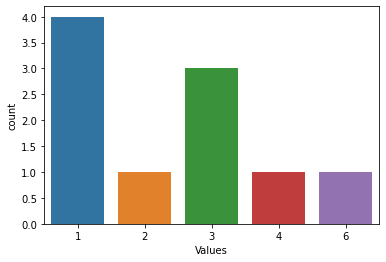

In [71]:
sns.countplot(x="Values", data=dice_10)

plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

<AxesSubplot:>

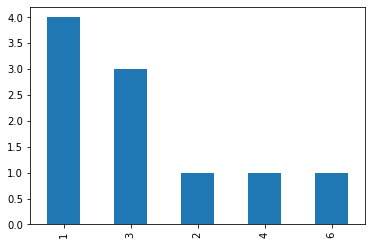

In [72]:
# your code here
dice_10['Values'].value_counts().plot(kind='bar')

In [73]:
"""
The only difference is that in the first plot we sort the values in ascending order, without taking in consideration the
number of counts each value observed.

In the second plot, we sort the values according to the counts each one observed, in a descending order.The value that 
registered more counts appears first and so on.
"""

'\nThe only difference is that in the first plot we sort the values in ascending order, without taking in consideration the\nnumber of counts each value observed.\n\nIn the second plot, we sort the values according to the counts each one observed, in a descending order.The value that \nregistered more counts appears first and so on.\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [74]:
# your code here

#def average(list):
#    return sum(list)/len(list)

def average(list):

    sum=0
    for x in list:
        sum = sum + x

    avg=sum/len(list)
    return avg


average(a)

2.5

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [75]:
# your code here

def freq(lst):
    dict = {}
    for i in lst:
        if dict.get(i):
            dict[i] += 1
        else:
            dict[i] = 1
    return dict
   
dict=freq(a)
    
list_dict = list(dict.items())
sum=0
count=0
for k,v in list_dict:
    sum = sum + (k*v)
      
average=sum/len(a)
    
print(average)


#https://stackoverflow.com/questions/40553332/finding-frequency-distribution-of-a-list-of-numbers-in-python

2.5


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [76]:
# your code here
def median(lst):
    sortedLst = sorted(lst)
    lstLen = len(lst)
    index = (lstLen - 1) // 2
   
    if (lstLen % 2):
        return sortedLst[index]
    else:
        return (sortedLst[index] + sortedLst[index + 1])/2.0

median(a)

#https://stackoverflow.com/questions/24101524/finding-median-of-list-in-python

2.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [77]:
# your code here
def quartiles(lst):
    q2 = (median(lst))
    lst = sorted(lst)
    mid = int(len(lst)/2)
    if len(lst)%2 == 0:
        q1 = median(lst[0:mid])
        q3 = median(lst[mid:len(lst)])
    else:
        q1 = median(lst[0:mid])
        q3 = median(lst[mid+1:len(lst)])
    return "q1:",q1,"q2:", q2, "q3:", q3

quartiles(a)

('q1:', 1, 'q2:', 2.5, 'q3:', 3)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [78]:
# your code here
dice_hundred = pd.read_csv('../data/roll_the_dice_hundred.csv')
dice_hundred.head()

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6


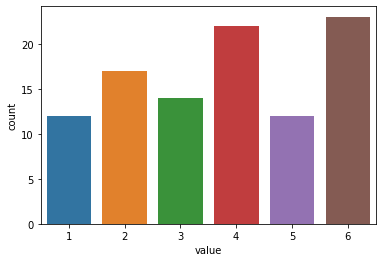

In [79]:
#1st Method

sns.countplot(x="value", data=dice_hundred)

plt.show()

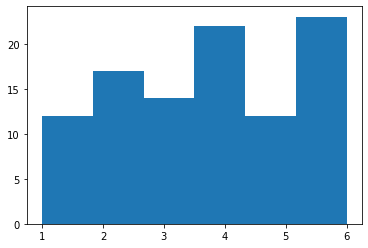

In [80]:
#2nd Method

data_value = sorted(dice_hundred['value'])
plt.hist(data_value, bins=6)

plt.show()

In [81]:
"""
Value 6 as the larger number of counts, than it is value 4 that has the second larger number of counts, than it is value 2,
then it is value 3, then values 1 and 5 have the same number of counts.
"""

'\nValue 6 as the larger number of counts, than it is value 4 that has the second larger number of counts, than it is value 2,\nthen it is value 3, then values 1 and 5 have the same number of counts.\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [82]:
# your code here
def rolling_a_dice():
    roll = int(input("How many times you want to role the dice?: "))
    return random.choices([1,2,3,4,5,6], k=roll)

b=(rolling_a_dice())
print(b)

How many times you want to role the dice?: 100
[4, 1, 5, 2, 2, 6, 3, 2, 3, 6, 4, 1, 6, 4, 2, 5, 2, 2, 6, 6, 2, 1, 6, 1, 5, 5, 4, 5, 4, 4, 4, 6, 1, 1, 2, 2, 1, 1, 3, 3, 3, 2, 2, 2, 4, 3, 6, 5, 6, 4, 3, 4, 6, 1, 3, 6, 6, 5, 1, 5, 2, 4, 6, 2, 1, 4, 5, 2, 1, 3, 3, 4, 3, 5, 6, 4, 1, 6, 1, 4, 4, 3, 1, 1, 2, 3, 6, 4, 2, 5, 3, 2, 3, 4, 4, 2, 1, 5, 1, 2]


In [83]:
def average(list):

    sum=0
    for x in list:
        sum = sum + x

    avg=sum/len(list)
    return avg


average(b)

3.35

#### 3.- Now, calculate the frequency distribution.


In [84]:
# your code here
def freq(lst):
    dict = {}
    for i in lst:
        if dict.get(i):
            dict[i] += 1
        else:
            dict[i] = 1
    return dict
   
dict=freq(b)

print(dict)

{4: 19, 1: 18, 5: 12, 2: 20, 6: 16, 3: 15}


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

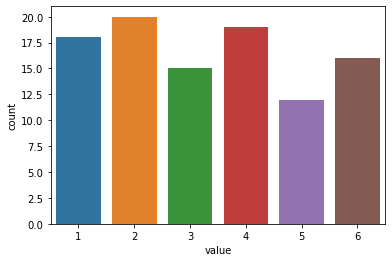

In [85]:
# your code here

dice_hundred=pd.DataFrame(b,columns=["value"])
dice_hundred

sns.countplot(x="value", data=dice_hundred)

plt.show()

In [86]:
"""
As we increase the number of dice rolls, the average will tend to converge to 3.5, becasuse all values will tend to have the
same number of counts and we will get a uniform distribution.
"""

'\nyour comments here\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [87]:
# your code here
dice_thousand = pd.read_csv('../data/roll_the_dice_thousand.csv')
dice_thousand

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5
...,...,...,...
995,995,995,1
996,996,996,4
997,997,997,4
998,998,998,3


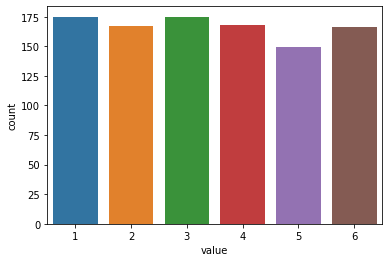

In [88]:
data2=pd.DataFrame(b,columns=["value"])
data2

sns.countplot(x="value", data=dice_thousand)

plt.show()

In [89]:
"""
All values have almost the same count of observations. The sample increased from 100 t0 1000 observations and as a
consequence we tend to get a uniform distribution of the counts (remember that the probability of getting a value is 1/6 and 
as the observations increase each one of the values will tend to have linked the same number of counts/observations).
"""

'\nAll values have almost the same count of observations. The sample increased from 100 t0 1000 observations and as a\nconsequence we tend to get a uniform distribution of the counts (remember that the probability of getting a value is 1/6 and \nas the observations increase each value will tend to have linked the same number of counts/observations).\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [90]:
# your code here
ages_population = pd.read_csv('../data/ages_population.csv')
ages_population.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


In [103]:
ages_population_list=list(ages_population['observation'])

def freq(lst):
    dict = {}
    for i in lst:
        if dict.get(i):
            dict[i] += 1
        else:
            dict[i] = 1
    return dict
   
dict=freq(ages_population_list)

print(dict)


{68.0: 3, 12.0: 11, 45.0: 29, 38.0: 30, 49.0: 19, 27.0: 25, 39.0: 45, 42.0: 32, 33.0: 22, 30.0: 34, 25.0: 19, 44.0: 23, 53.0: 12, 46.0: 23, 50.0: 16, 22.0: 16, 6.0: 2, 29.0: 26, 35.0: 33, 28.0: 20, 26.0: 23, 60.0: 4, 41.0: 36, 52.0: 14, 32.0: 30, 23.0: 17, 15.0: 8, 40.0: 27, 63.0: 7, 31.0: 24, 34.0: 29, 61.0: 2, 64.0: 2, 37.0: 30, 56.0: 15, 14.0: 10, 13.0: 6, 51.0: 9, 36.0: 31, 18.0: 7, 48.0: 19, 58.0: 7, 20.0: 13, 54.0: 13, 19.0: 11, 62.0: 4, 55.0: 13, 21.0: 14, 43.0: 32, 17.0: 10, 7.0: 1, 47.0: 17, 1.0: 2, 16.0: 8, 24.0: 18, 59.0: 8, 57.0: 7, 8.0: 5, 67.0: 4, 2.0: 2, 66.0: 3, 4.0: 1, 73.0: 1, 82.0: 1, 70.0: 1, 5.0: 2, 71.0: 1, 9.0: 2, 69.0: 1, 11.0: 3, 10.0: 3, 65.0: 2}


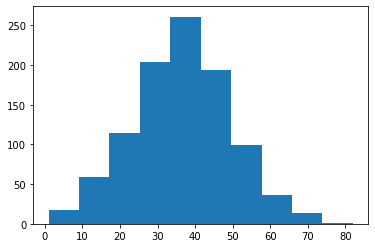

In [95]:
ages_population_sorted = sorted(ages_population['observation'])
plt.hist(ages_population_sorted)


plt.show()

In [100]:
#It seems the mean is between 30/40 and the standard deviation around 15.

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [98]:
# your code here
ages_population.describe()

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


In [ ]:
"""
your comments here

They fall inside the ranges I guessed. The popupation seems to follow a normal distribution and as so, it was not so hard to
guess the mean and standard deviation of the population.

"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [101]:
# your code here
ages_population2 = pd.read_csv('../data/ages_population2.csv')
ages_population2.head()

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0


In [104]:
ages_population2_list=list(ages_population2['observation'])

def freq(lst):
    dict = {}
    for i in lst:
        if dict.get(i):
            dict[i] += 1
        else:
            dict[i] = 1
    return dict
   
dict=freq(ages_population2_list)

print(dict)


{25.0: 98, 31.0: 61, 29.0: 115, 28.0: 139, 30.0: 90, 24.0: 78, 26.0: 120, 21.0: 17, 27.0: 125, 23.0: 41, 22.0: 35, 32.0: 31, 20.0: 13, 33.0: 22, 19.0: 3, 34.0: 7, 35.0: 3, 36.0: 2}


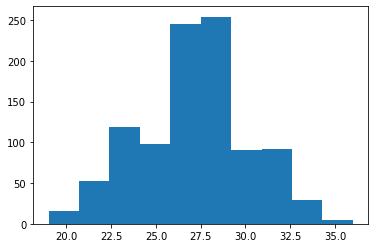

In [105]:
ages_population2_sorted = sorted(ages_population2['observation'])
plt.hist(ages_population2_sorted)


plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
This distribution is different from the previous one. Ages go from 19 to 36
On the previous one was from 0 to 80. Also, the distribution show that there is a huge concentration around the ages of 26 and 
28 turning the distribution almost bimodal.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [106]:
# your code here
ages_population2.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


In [ ]:
"""
The ratio stdev/mean in this population is smaller than the ratio of the first population, so the dispersion of ages is not 
so large in this second population, as compared to the first population.

"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [107]:
# your code here

ages_population3 = pd.read_csv('../data/ages_population3.csv')
ages_population3.head()

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0


In [108]:

ages_population3_list=list(ages_population3['observation'])

def freq(lst):
    dict = {}
    for i in lst:
        if dict.get(i):
            dict[i] += 1
        else:
            dict[i] = 1
    return dict
   
dict=freq(ages_population3_list)

print(dict)

{21.0: 14, 24.0: 19, 31.0: 21, 54.0: 9, 52.0: 17, 37.0: 31, 69.0: 17, 36.0: 26, 30.0: 24, 64.0: 12, 76.0: 1, 73.0: 6, 42.0: 14, 67.0: 22, 28.0: 18, 50.0: 21, 70.0: 19, 57.0: 8, 20.0: 11, 27.0: 19, 51.0: 14, 56.0: 10, 44.0: 17, 49.0: 18, 65.0: 15, 32.0: 37, 18.0: 9, 45.0: 24, 40.0: 21, 66.0: 19, 72.0: 8, 43.0: 22, 48.0: 25, 35.0: 31, 41.0: 25, 17.0: 10, 23.0: 11, 47.0: 15, 33.0: 17, 15.0: 8, 26.0: 15, 75.0: 2, 29.0: 25, 55.0: 13, 63.0: 12, 39.0: 29, 46.0: 22, 22.0: 11, 71.0: 11, 68.0: 17, 60.0: 6, 34.0: 20, 61.0: 6, 12.0: 4, 38.0: 25, 74.0: 6, 25.0: 17, 53.0: 14, 62.0: 3, 59.0: 8, 19.0: 12, 77.0: 2, 14.0: 5, 16.0: 9, 1.0: 1, 11.0: 2, 13.0: 2, 9.0: 1, 10.0: 2, 2.0: 2, 8.0: 1, 58.0: 6, 4.0: 2, 5.0: 1, 7.0: 1}


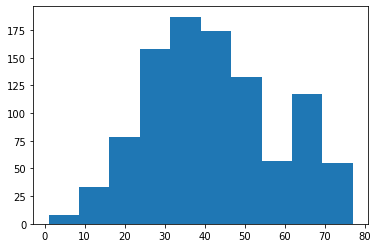

In [109]:
ages_population3_sorted = sorted(ages_population3['observation'])
plt.hist(ages_population3_sorted)


plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [110]:
# your code here
ages_population3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [ ]:
"""
The ration stdev/mean in this population shows also a large dispersion of ages and its relatively bigger when compared with the 
first population. The histogram shows that the interval of ages between 60 and 70 as an important concentration of individuals,
which might create distortions on the calculus of the mean and stdev (increases both measures) of the entire population.


"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [112]:
# your code here

def median(lst):
    sortedLst = sorted(lst)
    lstLen = len(lst)
    index = (lstLen - 1) // 2
   
    if (lstLen % 2):
        return sortedLst[index]
    else:
        return (sortedLst[index] + sortedLst[index + 1])/2.0

print(median(ages_population3_list))


def quartiles(lst):
    q2 = (median(lst))
    lst = sorted(lst)
    mid = int(len(lst)/2)
    if len(lst)%2 == 0:
        q1 = median(lst[0:mid])
        q3 = median(lst[mid:len(lst)])
    else:
        q1 = median(lst[0:mid])
        q3 = median(lst[mid+1:len(lst)])
    return "q1:",q1,"q2:", q2, "q3:", q3

print(quartiles(ages_population3_list))

40.0
('q1:', 30.0, 'q2:', 40.0, 'q3:', 53.0)


In [ ]:
"""
The median and the mean are almost the same, but the mean is larger than the median. That concentration of counts for the
ages of 60-70 can explain this difference. We can also notice this situation by seeing that the difference from mthe 1st
quartile to the median is smaller than the difference from the mediam to the 3rd quartile.

"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [114]:
# your code here
ages_population.describe()

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


In [115]:
"""
The 1st and 3rd quartiles of the 1st population are more close to the mean, because the distribution is not so assymetric.
"""

'\nThe quartiles of the 1st population \n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""